In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AppliedAI/train_LZV4RXX.csv", low_memory = False)
df.tail()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1
6999,7000,31,1.0,Aadhar,705108,900660,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [5]:
df.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [6]:
df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
dtype: object

In [7]:
# Print out columns with their respective numbers of missing values
df.isna().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [8]:
#Display the proportion of missing data
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
loan_id             0.000
age                 0.000
education           0.035
proof_submitted     0.000
loan_amount         0.000
asset_cost          0.000
no_of_loans         0.000
no_of_curr_loans    0.000
last_delinq_none    0.000
loan_default        0.000
dtype: float64



In [9]:
# names of the columns
columns = ['education']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    df[column] = df[column].fillna(999)

In [10]:
df.isna().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

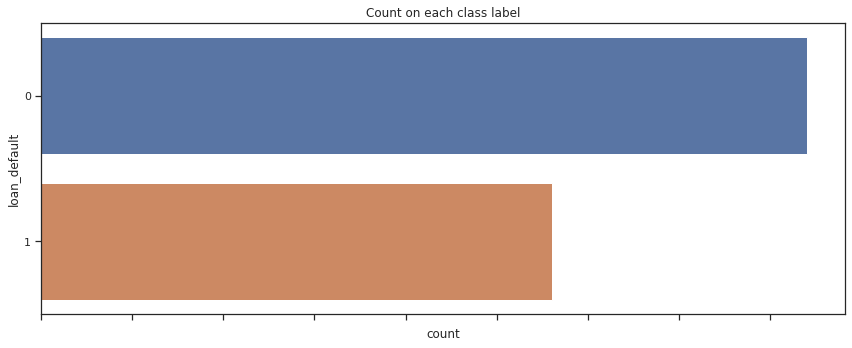

In [11]:
# Check for Class imbalances
plt.figure(figsize=(12,5))
sns.set(rc={'figure.figsize':(50, 15)}, style='ticks')
g = sns.countplot(y=df["loan_default"])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count on each class label')
plt.tight_layout()
plt.show()

In [12]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            sns.set(rc={'figure.figsize':(50, 15)}, style='ticks')
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()

     
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            sns.set(rc={'figure.figsize':(25, 15)}, style='dark')
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [13]:
quality_report(df)

,Total NaN,Percent of NaN,Nunique,Dtype
loan_id,0,0.0,7000,int64
age,0,0.0,30,int64
education,0,0.0,3,float64
proof_submitted,0,0.0,5,object
loan_amount,0,0.0,2655,int64
asset_cost,0,0.0,5480,int64
no_of_loans,0,0.0,57,int64
no_of_curr_loans,0,0.0,21,int64
last_delinq_none,0,0.0,2,int64
loan_default,0,0.0,2,int64


count    7000.000000
mean     3500.500000
std      2020.870275
min         1.000000
25%      1750.750000
50%      3500.500000
75%      5250.250000
max      7000.000000
Name: loan_id, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


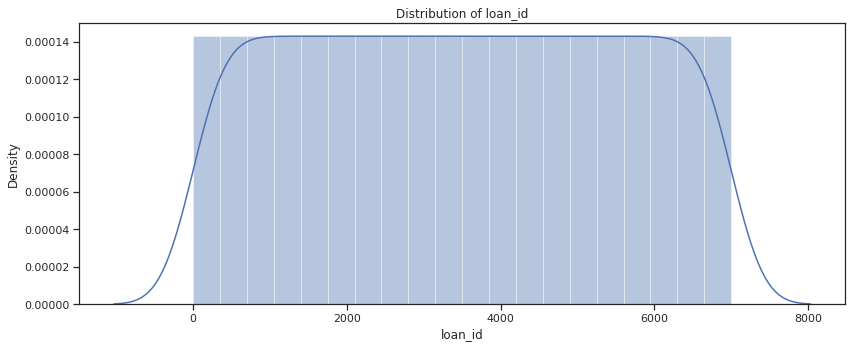

count    7000.000000
mean       36.096571
std         7.587700
min        21.000000
25%        29.000000
50%        36.000000
75%        43.000000
max        50.000000
Name: age, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


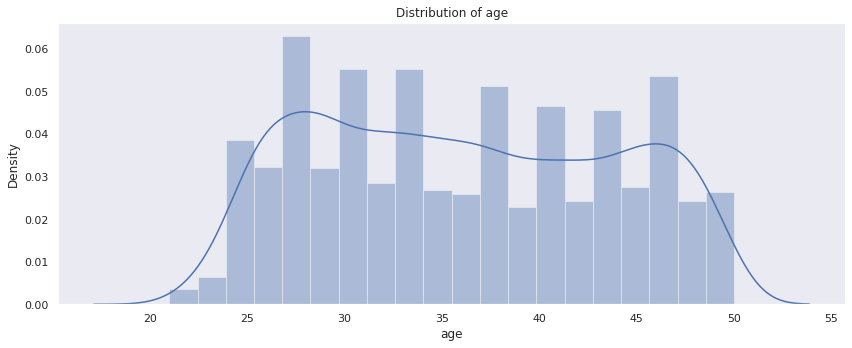

count    7000.000000
mean       36.472286
std       183.322667
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max       999.000000
Name: education, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


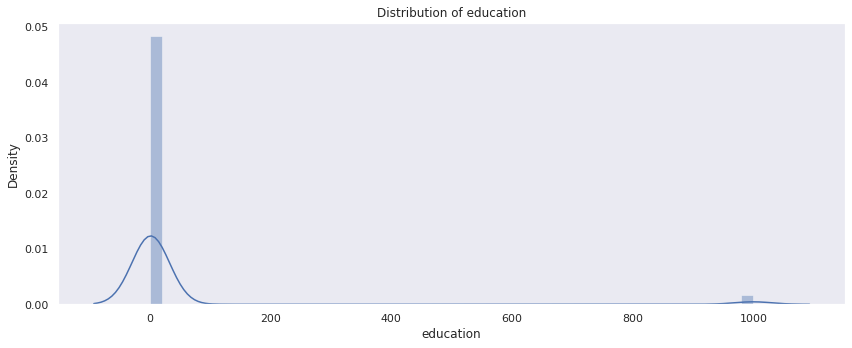

count    7.000000e+03
mean     6.633552e+05
std      1.498128e+05
min      1.678800e+05
25%      5.777880e+05
50%      6.571080e+05
75%      7.373640e+05
max      1.781376e+06
Name: loan_amount, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


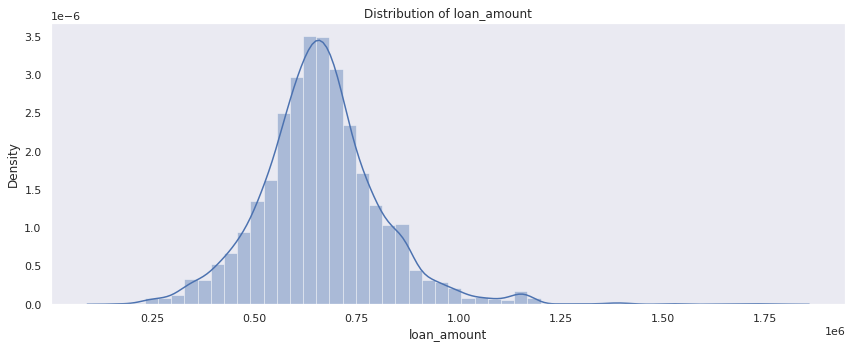

count    7.000000e+03
mean     9.162998e+05
std      2.144922e+05
min      4.733520e+05
25%      7.979010e+05
50%      8.584260e+05
75%      9.576750e+05
max      2.419200e+06
Name: asset_cost, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


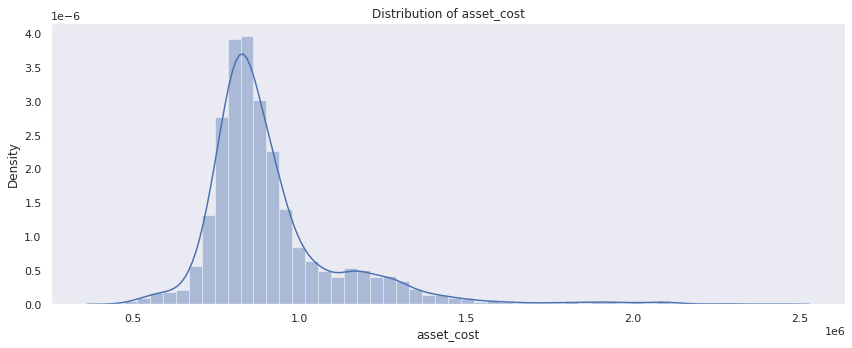

count    7000.000000
mean        2.853286
std         5.471932
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       109.000000
Name: no_of_loans, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


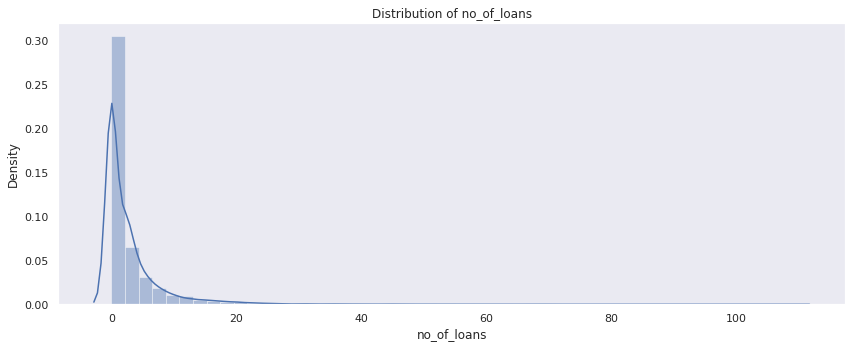

count    7000.000000
mean        1.371143
std         2.189278
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        33.000000
Name: no_of_curr_loans, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


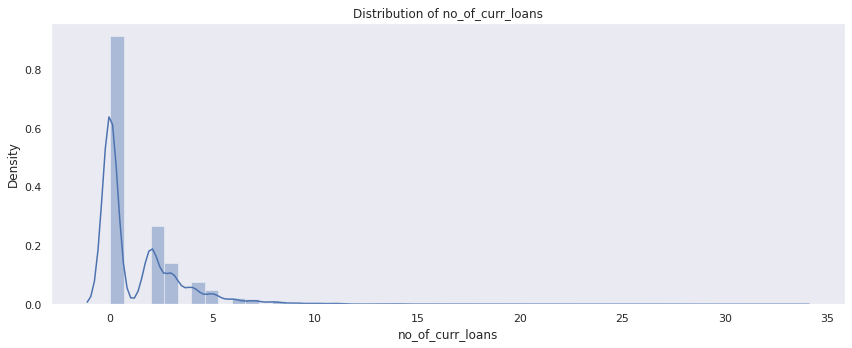

count    7000.000000
mean        0.013286
std         0.114504
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: last_delinq_none, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


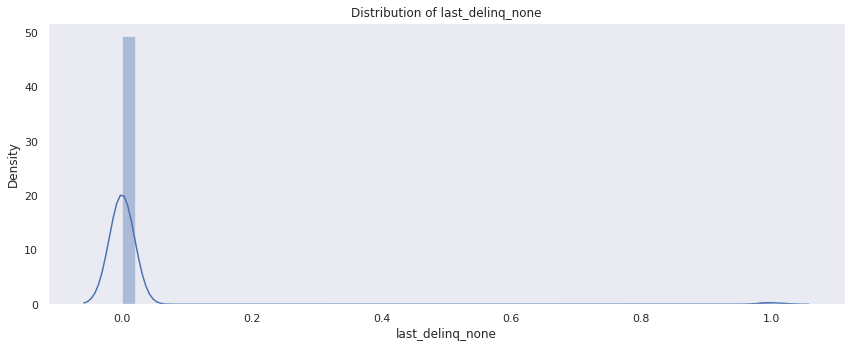

count    7000.000000
mean        0.400000
std         0.489933
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: loan_default, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


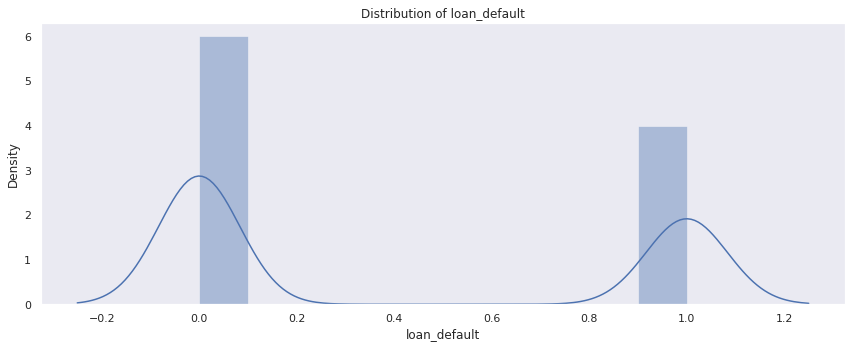

In [14]:
numeric_distribution_plot(df)

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64


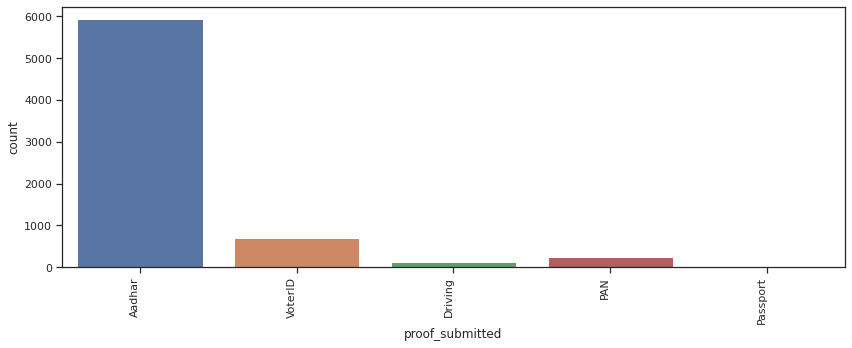

In [15]:
object_count_plot(df)

In [16]:
# Converting type of columns to category
df['proof_submitted']=df['proof_submitted'].astype('category')
#Assigning numerical values and storing it in another columns
df['proof_submitted_new']=df['proof_submitted'].cat.codes

In [17]:
df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_new
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1,4
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0,0


In [18]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['proof_submitted_new']]).toarray())

In [19]:
New_df=df.join(enc_data)
New_df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_new,0,1,2,3,4
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,0,1.0,0.0,0.0,0.0,0.0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,0,1.0,0.0,0.0,0.0,0.0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1,4,0.0,0.0,0.0,0.0,1.0
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Select target
y = New_df["loan_default"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int64

In [21]:
# Select Features
X = New_df.drop(["loan_default", "proof_submitted"], axis = 1)
X.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_new,0,1,2,3,4
0,1,27,1.0,504264,820920,2,2,0,0,1.0,0.0,0.0,0.0,0.0
1,2,48,1.0,728556,831444,6,2,0,0,1.0,0.0,0.0,0.0,0.0
2,3,30,2.0,642936,826092,0,0,0,4,0.0,0.0,0.0,0.0,1.0
3,4,28,1.0,746556,930924,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,5,29,1.0,1139880,1902000,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
finalDf = pd.concat([principalDf, df[['loan_default']]], axis = 1)

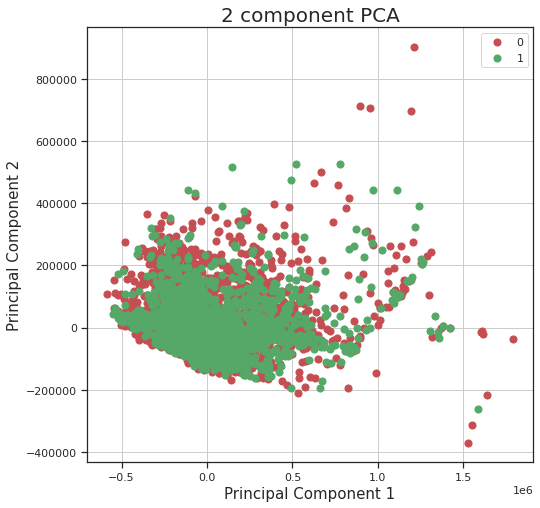

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = New_df['loan_default'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [25]:
pca.explained_variance_ratio_

array([0.88560671, 0.1143332 ])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(kernel='linear')

In [29]:
#predict trained model on test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Confusion matrix:
 [[382 455]
 [208 355]]
Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.46      0.54       837
           1       0.44      0.63      0.52       563

    accuracy                           0.53      1400
   macro avg       0.54      0.54      0.53      1400
weighted avg       0.56      0.53      0.53      1400



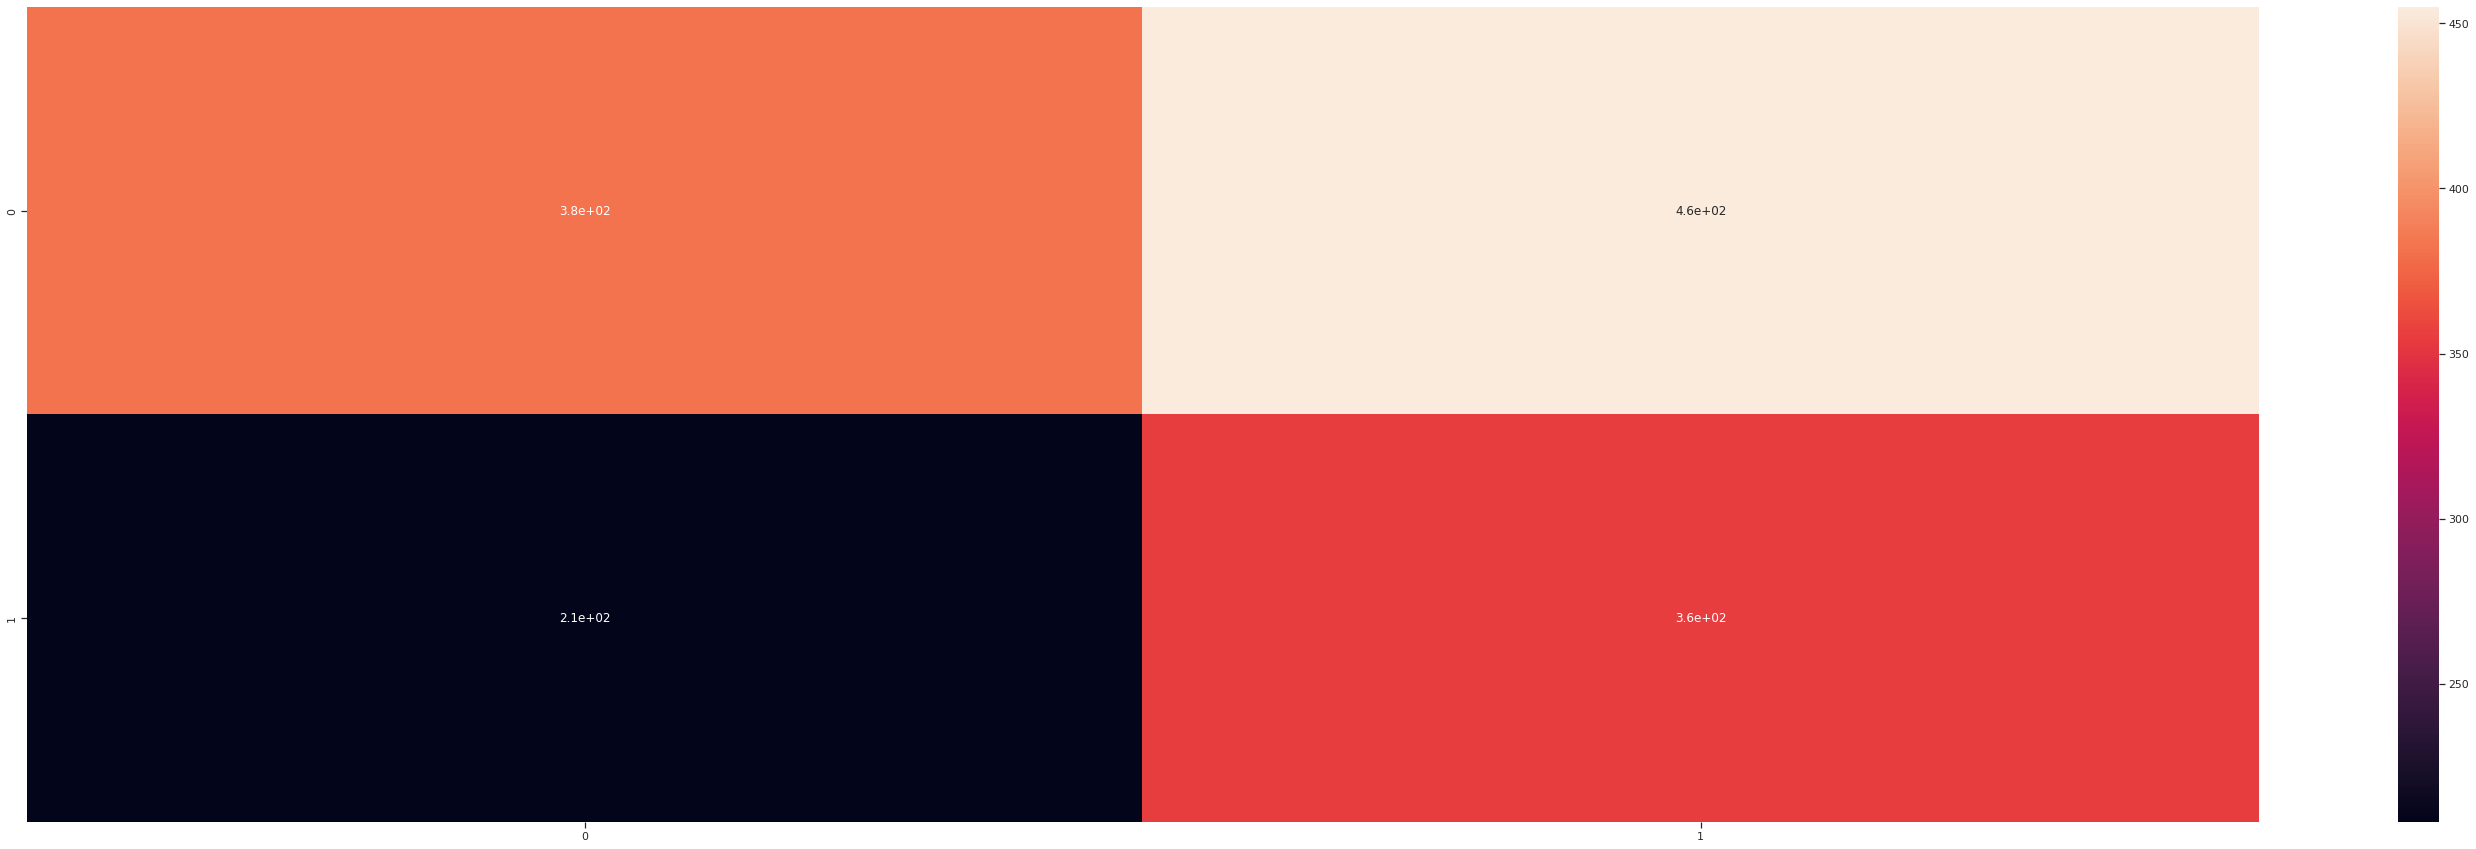

In [30]:
# plot confusion matrix
target_names = ['Not potable', 'potable']
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns

con_matrix = np.array(confusion_matrix(y_test, y_pred ))
print("Confusion matrix:\n" , con_matrix)
sns.heatmap(con_matrix, annot =True)                                                                                                                                                                                                        

#Plot classification report
class_report = classification_report(y_test, y_pred, 
                                    )
print("Classification report : \n" , class_report)